In [1]:
import torchvision.models as models

vgg16 = models.vgg16(pretrained=True)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:07<00:00, 71.1MB/s]


In [3]:
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"

In [4]:
from torchsummary import summary
vgg16 = vgg16.to(device)
summary(vgg16, (3, 224, 224), 64)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [64, 64, 224, 224]           1,792
              ReLU-2         [64, 64, 224, 224]               0
            Conv2d-3         [64, 64, 224, 224]          36,928
              ReLU-4         [64, 64, 224, 224]               0
         MaxPool2d-5         [64, 64, 112, 112]               0
            Conv2d-6        [64, 128, 112, 112]          73,856
              ReLU-7        [64, 128, 112, 112]               0
            Conv2d-8        [64, 128, 112, 112]         147,584
              ReLU-9        [64, 128, 112, 112]               0
        MaxPool2d-10          [64, 128, 56, 56]               0
           Conv2d-11          [64, 256, 56, 56]         295,168
             ReLU-12          [64, 256, 56, 56]               0
           Conv2d-13          [64, 256, 56, 56]         590,080
             ReLU-14          [64, 256,

In [5]:
vgg16

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [6]:
vgg11 = models.vgg11(pretrained=True).to(device)
vgg13 = models.vgg13(pretrained=True).to(device)
vgg19 = models.vgg19(pretrained=True).to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG11_Weights.IMAGENET1K_V1`. You can also use `weights=VGG11_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg11-8a719046.pth" to /root/.cache/torch/hub/checkpoints/vgg11-8a719046.pth
100%|██████████| 507M/507M [00:05<00:00, 106MB/s] 
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future.

In [7]:
vgg_models = [vgg11, vgg13, vgg16, vgg19]

summary(vgg11, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
         MaxPool2d-3         [-1, 64, 112, 112]               0
            Conv2d-4        [-1, 128, 112, 112]          73,856
              ReLU-5        [-1, 128, 112, 112]               0
         MaxPool2d-6          [-1, 128, 56, 56]               0
            Conv2d-7          [-1, 256, 56, 56]         295,168
              ReLU-8          [-1, 256, 56, 56]               0
            Conv2d-9          [-1, 256, 56, 56]         590,080
             ReLU-10          [-1, 256, 56, 56]               0
        MaxPool2d-11          [-1, 256, 28, 28]               0
           Conv2d-12          [-1, 512, 28, 28]       1,180,160
             ReLU-13          [-1, 512, 28, 28]               0
           Conv2d-14          [-1, 512,

In [8]:
import torchvision
from torchvision import transforms as T

transforms = T.Compose([
    T.Resize((224, 224)),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

train_dataset = torchvision.datasets.CIFAR100(
    root="./data",
    download=True,
    train=True,
    transform=transforms
)
test_dataset = torchvision.datasets.CIFAR100(
    root="./data",
    download=True,
    train=False,
    transform=transforms
)

100%|██████████| 169001437/169001437 [00:03<00:00, 43219504.95it/s]


Extracting ./data/cifar-100-python.tar.gz to ./data
Files already downloaded and verified


In [9]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(
    train_dataset,
    batch_size=64,
    shuffle=True
)
test_dataloader = DataLoader(
    test_dataset,
    batch_size=64,
    shuffle=True
)

In [19]:
cifar100_classes = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle',
    'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
    'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard',
    'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain',
    'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree',
    'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket',
    'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider',
    'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor',
    'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm'
]


Text(0.5, 1.0, 'house')

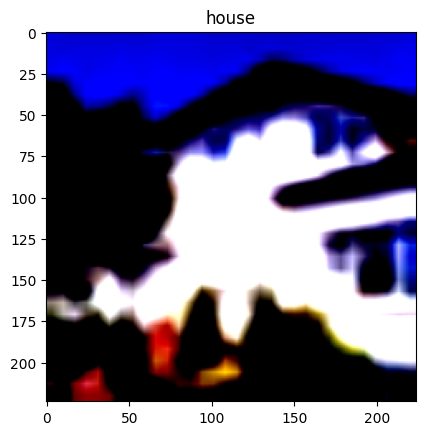

In [23]:
import matplotlib.pyplot as plt

images, labels = next(iter(train_dataloader))
plt.imshow(images[0].permute(1, 2, 0))
plt.title(cifar100_classes[labels[0]])

In [24]:
# Changing the output shape to 100 for cifar100 dataset
for model in vgg_models:
  model.classifier[6] = torch.nn.Linear(4096, 100)
  model.to(device)

In [28]:
# Freeze the parameters
# for vgg16
for name, param in vgg16.named_parameters():
    if 'features.30' in name or 'classifier' in name:
        param.requires_grad = True
    else:
        param.requires_grad = False
summary(vgg16, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
            Conv2d-3         [-1, 64, 224, 224]          36,928
              ReLU-4         [-1, 64, 224, 224]               0
         MaxPool2d-5         [-1, 64, 112, 112]               0
            Conv2d-6        [-1, 128, 112, 112]          73,856
              ReLU-7        [-1, 128, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]         147,584
              ReLU-9        [-1, 128, 112, 112]               0
        MaxPool2d-10          [-1, 128, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]         295,168
             ReLU-12          [-1, 256, 56, 56]               0
           Conv2d-13          [-1, 256, 56, 56]         590,080
             ReLU-14          [-1, 256,

In [31]:
# For vgg 11
for name, param in vgg11.named_parameters():
  if "features.18" in name or "classifier" in name:
    param.requires_grad = True
  else:
    param.requires_grad = False

summary(vgg11, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
         MaxPool2d-3         [-1, 64, 112, 112]               0
            Conv2d-4        [-1, 128, 112, 112]          73,856
              ReLU-5        [-1, 128, 112, 112]               0
         MaxPool2d-6          [-1, 128, 56, 56]               0
            Conv2d-7          [-1, 256, 56, 56]         295,168
              ReLU-8          [-1, 256, 56, 56]               0
            Conv2d-9          [-1, 256, 56, 56]         590,080
             ReLU-10          [-1, 256, 56, 56]               0
        MaxPool2d-11          [-1, 256, 28, 28]               0
           Conv2d-12          [-1, 512, 28, 28]       1,180,160
             ReLU-13          [-1, 512, 28, 28]               0
           Conv2d-14          [-1, 512,

In [32]:
# For Vgg 13
for name, param in vgg13.named_parameters():
    if 'features.30' in name or 'classifier' in name:
        param.requires_grad = True
    else:
        param.requires_grad = False
summary(vgg13, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
            Conv2d-3         [-1, 64, 224, 224]          36,928
              ReLU-4         [-1, 64, 224, 224]               0
         MaxPool2d-5         [-1, 64, 112, 112]               0
            Conv2d-6        [-1, 128, 112, 112]          73,856
              ReLU-7        [-1, 128, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]         147,584
              ReLU-9        [-1, 128, 112, 112]               0
        MaxPool2d-10          [-1, 128, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]         295,168
             ReLU-12          [-1, 256, 56, 56]               0
           Conv2d-13          [-1, 256, 56, 56]         590,080
             ReLU-14          [-1, 256,

In [33]:
# for vgg19

for name, param in vgg19.named_parameters():
    if 'features.36' in name or 'classifier' in name:
        param.requires_grad = True
    else:
        param.requires_grad = False



In [41]:
for model in vgg_models:
  print(model.__class__.__name__)
  summary(model, (3, 224, 224))

VGG
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
         MaxPool2d-3         [-1, 64, 112, 112]               0
            Conv2d-4        [-1, 128, 112, 112]          73,856
              ReLU-5        [-1, 128, 112, 112]               0
         MaxPool2d-6          [-1, 128, 56, 56]               0
            Conv2d-7          [-1, 256, 56, 56]         295,168
              ReLU-8          [-1, 256, 56, 56]               0
            Conv2d-9          [-1, 256, 56, 56]         590,080
             ReLU-10          [-1, 256, 56, 56]               0
        MaxPool2d-11          [-1, 256, 28, 28]               0
           Conv2d-12          [-1, 512, 28, 28]       1,180,160
             ReLU-13          [-1, 512, 28, 28]               0
           Conv2d-14          [-1, 

In [40]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizers = []
for model in vgg_models:
  optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
  optimizers.append(optimizer)


In [42]:
len(train_dataloader)

782

In [45]:
model_names = ["vgg11", "vgg13", "vgg16", "vgg19"]

In [61]:
from tqdm import tqdm

EPOCHS = 5
def train(model: torch.nn.Module, model_name: str, optimizer: torch.optim, Epochs: int = 5):
  for epoch in tqdm(range(Epochs)):
    for i, (images, labels) in enumerate(train_dataloader):
      images = images.to(device)
      labels = labels.to (device)

      outputs = model(images)

      loss = loss_fn(outputs, labels)

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      if (i+1) % 300 == 0:
        print(f"Epoch {epoch+1}/{EPOCHS}, Step: {i+1}/{len(train_dataloader)}, Loss: {loss.item()}")


In [51]:
for i, model in enumerate(vgg_models):
  train(model, model_names[i], optimizers[i])
  print("--------------------------------------------------------------------------------------")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1/5, Step: 300/782, Loss: 1.9869767427444458
Epoch 1/5, Step: 600/782, Loss: 2.2130305767059326


 20%|██        | 1/5 [02:38<10:33, 158.34s/it]

Epoch 2/5, Step: 300/782, Loss: 1.3705898523330688
Epoch 2/5, Step: 600/782, Loss: 1.4874998331069946


 40%|████      | 2/5 [05:17<07:55, 158.59s/it]

Epoch 3/5, Step: 300/782, Loss: 1.1022875308990479
Epoch 3/5, Step: 600/782, Loss: 1.1816924810409546


 60%|██████    | 3/5 [07:55<05:17, 158.65s/it]

Epoch 4/5, Step: 300/782, Loss: 1.060582160949707
Epoch 4/5, Step: 600/782, Loss: 1.6460140943527222


 80%|████████  | 4/5 [10:34<02:38, 158.68s/it]

Epoch 5/5, Step: 300/782, Loss: 1.2689576148986816
Epoch 5/5, Step: 600/782, Loss: 1.515452265739441


100%|██████████| 5/5 [13:13<00:00, 158.66s/it]


--------------------------------------------------------------------------------------


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1/5, Step: 300/782, Loss: 2.6422955989837646
Epoch 1/5, Step: 600/782, Loss: 3.119044065475464


 20%|██        | 1/5 [03:41<14:47, 221.97s/it]

Epoch 2/5, Step: 300/782, Loss: 2.2295982837677
Epoch 2/5, Step: 600/782, Loss: 2.03690505027771


 40%|████      | 2/5 [07:23<11:05, 221.97s/it]

Epoch 3/5, Step: 300/782, Loss: 1.5557031631469727
Epoch 3/5, Step: 600/782, Loss: 1.7453514337539673


 60%|██████    | 3/5 [11:05<07:23, 221.97s/it]

Epoch 4/5, Step: 300/782, Loss: 1.5023077726364136
Epoch 4/5, Step: 600/782, Loss: 1.4466646909713745


 80%|████████  | 4/5 [14:47<03:41, 221.95s/it]

Epoch 5/5, Step: 300/782, Loss: 1.8848553895950317
Epoch 5/5, Step: 600/782, Loss: 2.1443214416503906


100%|██████████| 5/5 [18:29<00:00, 221.95s/it]


--------------------------------------------------------------------------------------


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1/5, Step: 300/782, Loss: 2.711747884750366
Epoch 1/5, Step: 600/782, Loss: 2.396015167236328


 20%|██        | 1/5 [04:25<17:41, 265.42s/it]

Epoch 2/5, Step: 300/782, Loss: 2.0794639587402344
Epoch 2/5, Step: 600/782, Loss: 2.934536933898926


 40%|████      | 2/5 [08:53<13:20, 266.99s/it]

Epoch 3/5, Step: 300/782, Loss: 1.7198152542114258
Epoch 3/5, Step: 600/782, Loss: 1.7040741443634033


 60%|██████    | 3/5 [13:21<08:54, 267.25s/it]

Epoch 4/5, Step: 300/782, Loss: 2.407637119293213
Epoch 4/5, Step: 600/782, Loss: 1.6085090637207031


 80%|████████  | 4/5 [17:46<04:26, 266.56s/it]

Epoch 5/5, Step: 300/782, Loss: 1.9711940288543701
Epoch 5/5, Step: 600/782, Loss: 1.7599153518676758


100%|██████████| 5/5 [22:11<00:00, 266.34s/it]


--------------------------------------------------------------------------------------


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1/5, Step: 300/782, Loss: 2.208526372909546
Epoch 1/5, Step: 600/782, Loss: 2.4983184337615967


 20%|██        | 1/5 [05:05<20:20, 305.10s/it]

Epoch 2/5, Step: 300/782, Loss: 2.418067216873169
Epoch 2/5, Step: 600/782, Loss: 1.961710810661316


 40%|████      | 2/5 [10:10<15:15, 305.18s/it]

Epoch 3/5, Step: 300/782, Loss: 2.215012311935425
Epoch 3/5, Step: 600/782, Loss: 2.162951707839966


 60%|██████    | 3/5 [15:15<10:10, 305.26s/it]

Epoch 4/5, Step: 300/782, Loss: 1.4428738355636597
Epoch 4/5, Step: 600/782, Loss: 2.2610623836517334


 80%|████████  | 4/5 [20:21<05:05, 305.29s/it]

Epoch 5/5, Step: 300/782, Loss: 1.7982455492019653
Epoch 5/5, Step: 600/782, Loss: 1.7673619985580444


100%|██████████| 5/5 [25:26<00:00, 305.28s/it]

--------------------------------------------------------------------------------------


In [52]:
def test(model: torch.nn.Module, model_name: str):
  correct = 0
  total = 0
  with torch.no_grad():
    for images, labels in test_dataloader:
      images = images.to(device)
      labels = labels.to(device)

      outputs = model(images)

      _, predicted = torch.max(outputs.data, 1)

      total += labels.size(0)
      correct += (predicted==labels).sum().item()
    print(f"Accuracy of the {model_name} on test size {total} is {correct/total}")

In [53]:
for i, model in enumerate(vgg_models):
  test(model, model_names[i])

Accuracy of the vgg11 on test size 10000 is 0.4852
Accuracy of the vgg13 on test size 10000 is 0.4507
Accuracy of the vgg16 on test size 10000 is 0.4628
Accuracy of the vgg19 on test size 10000 is 0.4727


In [55]:
vgg16_with_bn = models.vgg16_bn(pretrained=True).to(device)
summary(vgg16_with_bn, (3, 224, 224))

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
       BatchNorm2d-2         [-1, 64, 224, 224]             128
              ReLU-3         [-1, 64, 224, 224]               0
            Conv2d-4         [-1, 64, 224, 224]          36,928
       BatchNorm2d-5         [-1, 64, 224, 224]             128
              ReLU-6         [-1, 64, 224, 224]               0
         MaxPool2d-7         [-1, 64, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]          73,856
       BatchNorm2d-9        [-1, 128, 112, 112]             256
             ReLU-10        [-1, 128, 112, 112]               0
           Conv2d-11        [-1, 128, 112, 112]         147,584
      BatchNorm2d-12        [-1, 128, 112, 112]             256
             ReLU-13        [-1, 128, 112, 112]               0
        MaxPool2d-14          [-1, 128,

In [56]:
for name, param in vgg16_with_bn.named_parameters():
    if 'features.43' in name or 'classifier' in name:
        param.requires_grad = True
    else:
        param.requires_grad = False

In [57]:
vgg16_with_bn


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [58]:
vgg16_with_bn.classifier[6] = torch.nn.Linear(4096, 100)
vgg16_with_bn.to(device)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [59]:
optimizer = torch.optim.Adam(vgg16_with_bn.parameters(), lr=0.001)

In [62]:
train(vgg16_with_bn, "vgg16_with_bn", optimizer, Epochs=1)

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1/5, Step: 300/782, Loss: 2.6776998043060303
Epoch 1/5, Step: 600/782, Loss: 2.30515456199646


100%|██████████| 1/1 [05:03<00:00, 303.88s/it]


In [63]:
test(vgg16_with_bn, "VGG 16 with Batch Normalization")

Accuracy of the VGG 16 with Batch Normalization on test size 10000 is 0.3722
